In [1]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [2]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cuda device


In [3]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [4]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [5]:
X = torch.rand(1, 28, 28, device=device)
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

Predicted class: tensor([2], device='cuda:0')


In [9]:
input_image = torch.rand(3,28,28)
# print(f"input_image : {input_image}")
print(f"input_image.size() : {input_image.size()}")

input_image.size() : torch.Size([3, 28, 28])


In [11]:
input_image = torch.rand(3,5,5)
print(f"input_image : {input_image}")
print(f"input_image.size() : {input_image.size()}")

input_image : tensor([[[0.5431, 0.5771, 0.6900, 0.1042, 0.4640],
         [0.7301, 0.8296, 0.7359, 0.9679, 0.0300],
         [0.1793, 0.9274, 0.3789, 0.3394, 0.4966],
         [0.6124, 0.4974, 0.1060, 0.9923, 0.9907],
         [0.4070, 0.6833, 0.7473, 0.2705, 0.6173]],

        [[0.8602, 0.7359, 0.5154, 0.4029, 0.1092],
         [0.7905, 0.3598, 0.7245, 0.9655, 0.7321],
         [0.0778, 0.2476, 0.5306, 0.4616, 0.6414],
         [0.1801, 0.9488, 0.6743, 0.5339, 0.8331],
         [0.7867, 0.1605, 0.6082, 0.1590, 0.9476]],

        [[0.0814, 0.7015, 0.2252, 0.5246, 0.4299],
         [0.5923, 0.6198, 0.3995, 0.3880, 0.9634],
         [0.9590, 0.7950, 0.8489, 0.9346, 0.5538],
         [0.1094, 0.0293, 0.7447, 0.5261, 0.4558],
         [0.1474, 0.5555, 0.4724, 0.4291, 0.3096]]])
input_image.size() : torch.Size([3, 5, 5])


랜덤 사진을 누름

In [13]:
flatten = nn.Flatten()
flat_image = flatten(input_image)
print(f"flat_image : {flat_image}")
print(f"flat_image.size() : {flat_image.size()}")

flat_image : tensor([[0.5431, 0.5771, 0.6900, 0.1042, 0.4640, 0.7301, 0.8296, 0.7359, 0.9679,
         0.0300, 0.1793, 0.9274, 0.3789, 0.3394, 0.4966, 0.6124, 0.4974, 0.1060,
         0.9923, 0.9907, 0.4070, 0.6833, 0.7473, 0.2705, 0.6173],
        [0.8602, 0.7359, 0.5154, 0.4029, 0.1092, 0.7905, 0.3598, 0.7245, 0.9655,
         0.7321, 0.0778, 0.2476, 0.5306, 0.4616, 0.6414, 0.1801, 0.9488, 0.6743,
         0.5339, 0.8331, 0.7867, 0.1605, 0.6082, 0.1590, 0.9476],
        [0.0814, 0.7015, 0.2252, 0.5246, 0.4299, 0.5923, 0.6198, 0.3995, 0.3880,
         0.9634, 0.9590, 0.7950, 0.8489, 0.9346, 0.5538, 0.1094, 0.0293, 0.7447,
         0.5261, 0.4558, 0.1474, 0.5555, 0.4724, 0.4291, 0.3096]])
flat_image.size() : torch.Size([3, 25])


In [20]:
layer1 = nn.Linear(in_features=5*5, out_features=20)
hidden1 = layer1(flat_image)
print(f"hidden1 : {hidden1}")
print(f"hidden1.size() : {hidden1.size()}")

hidden1 : tensor([[-0.4894, -0.4525, -0.2711, -0.3933,  0.2165,  0.6037,  0.6165,  0.1974,
          0.0564, -0.4755,  0.5884, -0.2116, -0.3823, -0.0833, -0.5015,  0.2604,
          0.4620,  0.1683,  0.1749, -0.5067],
        [-0.1337, -0.5409, -0.3594, -0.1769,  0.2213,  0.5014,  0.7773, -0.0842,
         -0.0931, -0.5112,  0.6038, -0.2593, -0.2912, -0.0431, -0.2619,  0.4281,
          0.1016,  0.2302,  0.2646, -0.4212],
        [ 0.0072, -0.2226, -0.2638,  0.1355, -0.0898,  0.6755,  0.3448,  0.1602,
         -0.2588, -0.4499,  0.4740,  0.1361, -0.1944, -0.0424, -0.2559,  0.0876,
          0.2954,  0.1001, -0.0347, -0.5739]], grad_fn=<AddmmBackward0>)
hidden1.size() : torch.Size([3, 20])


 # matplotlib 사용 hidden layer 피처맵 시각화

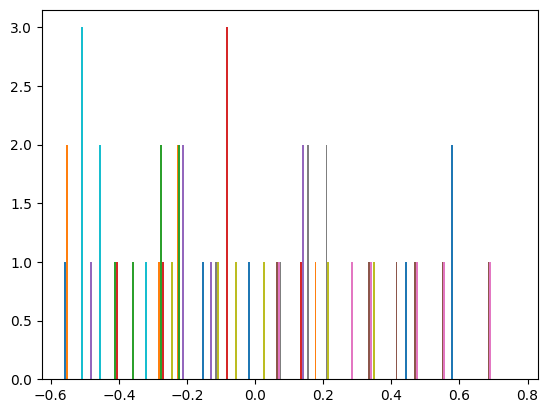

In [22]:
import matplotlib.pyplot as plt

# 히스토그램으로 시각화
plt.hist(hidden1.detach().numpy())
plt.show()

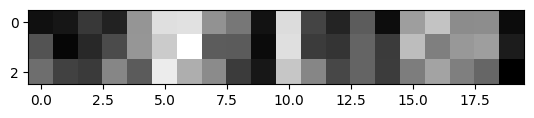

In [31]:
# 이미지로 시각화 (28x28 이미지로 변환 필요)
# image = hidden1.detach().view(28, 28).numpy()
image = hidden1.detach().view(3, 20).numpy()
plt.imshow(image, cmap='gray')
plt.show()

In [32]:
print(f"Before ReLU: {hidden1}\n\n")
hidden1 = nn.ReLU()(hidden1)
print(f"After ReLU: {hidden1}")

Before ReLU: tensor([[-0.4894, -0.4525, -0.2711, -0.3933,  0.2165,  0.6037,  0.6165,  0.1974,
          0.0564, -0.4755,  0.5884, -0.2116, -0.3823, -0.0833, -0.5015,  0.2604,
          0.4620,  0.1683,  0.1749, -0.5067],
        [-0.1337, -0.5409, -0.3594, -0.1769,  0.2213,  0.5014,  0.7773, -0.0842,
         -0.0931, -0.5112,  0.6038, -0.2593, -0.2912, -0.0431, -0.2619,  0.4281,
          0.1016,  0.2302,  0.2646, -0.4212],
        [ 0.0072, -0.2226, -0.2638,  0.1355, -0.0898,  0.6755,  0.3448,  0.1602,
         -0.2588, -0.4499,  0.4740,  0.1361, -0.1944, -0.0424, -0.2559,  0.0876,
          0.2954,  0.1001, -0.0347, -0.5739]], grad_fn=<AddmmBackward0>)


After ReLU: tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.2165, 0.6037, 0.6165, 0.1974, 0.0564,
         0.0000, 0.5884, 0.0000, 0.0000, 0.0000, 0.0000, 0.2604, 0.4620, 0.1683,
         0.1749, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.2213, 0.5014, 0.7773, 0.0000, 0.0000,
         0.0000, 0.6038, 0.0000, 0.0000, 0.0000, 0.00

In [34]:
seq_modules = nn.Sequential(
    flatten,
    layer1,
    nn.ReLU(),
    nn.Linear(20, 10)
)
input_image = torch.rand(3,5,5)
logits = seq_modules(input_image)

nn.Sequential은 PyTorch에서 제공하는 순차적 컨테이너 클래스입니다.   

장점:  

간단하고 직관적인 방식으로 모델을 정의할 수 있습니다.  
코드를 간결하게 만들 수 있습니다.  
레이어를 쉽게 추가하거나 제거할 수 있습니다.  
단점:  

모델 구조가 복잡해지면 코드를 이해하기 어려울 수 있습니다.  
레이어 간의 연결을 직접 제어할 수 없습니다.  

In [36]:
'''
import torch.nn as nn

# 레이어 정의
layer1 = nn.Linear(in_features=10, out_features=20)
layer2 = nn.ReLU()
layer3 = nn.Linear(in_features=20, out_features=10)

# 모델 생성
model = nn.Sequential(layer1, layer2, layer3)

# 모델 사용
input = torch.randn(10)
output = model(input)
'''

'\nimport torch.nn as nn\n\n# 레이어 정의\nlayer1 = nn.Linear(in_features=10, out_features=20)\nlayer2 = nn.ReLU()\nlayer3 = nn.Linear(in_features=20, out_features=10)\n\n# 모델 생성\nmodel = nn.Sequential(layer1, layer2, layer3)\n\n# 모델 사용\ninput = torch.randn(10)\noutput = model(input)\n'

In [38]:
'''
보통 layer 만 적는데 
layer1 = nn.Linear(in_features=28*28, out_features=20)
hidden1 = layer1(flat_image)
print(hidden1.size())
과 같이 히든 레이어를 찍어보는 이유는 다음과 같음

1. 피처맵 확인

hidden1 변수는 layer1 레이어의 출력을 저장합니다. 이를 통해 모델 학습 과정에서 중간 레이어의 피처맵을 확인할 수 있습니다.

2. 모델 디버깅

중간 레이어의 출력을 확인하여 모델 작동 방식을 디버깅하고 문제점을 파악할 수 있습니다.

3. 모델 개선

중간 레이어의 출력을 분석하여 모델 구조나 하이퍼파라미터를 개선할 수 있습니다.

4. 시각화

matplotlib 등의 라이브러리를 사용하여 hidden1 변수를 시각화하여 모델 작동 방식을 더 잘 이해할 수 있습니다.

5. 추가 분석

hidden1 변수를 사용하여 피처맵의 평균, 표준 편차, 히스토그램 등을 계산하여 모델에 대한 추가 분석을 수행할 수 있습니다.


'''

'\n보통 layer 만 적는데 \nlayer1 = nn.Linear(in_features=28*28, out_features=20)\nhidden1 = layer1(flat_image)\nprint(hidden1.size())\n과 같이 히든 레이어를 찍어보는 이유는 다음과 같음\n\n1. 피처맵 확인\n\nhidden1 변수는 layer1 레이어의 출력을 저장합니다. 이를 통해 모델 학습 과정에서 중간 레이어의 피처맵을 확인할 수 있습니다.\n\n2. 모델 디버깅\n\n중간 레이어의 출력을 확인하여 모델 작동 방식을 디버깅하고 문제점을 파악할 수 있습니다.\n\n3. 모델 개선\n\n중간 레이어의 출력을 분석하여 모델 구조나 하이퍼파라미터를 개선할 수 있습니다.\n\n4. 시각화\n\nmatplotlib 등의 라이브러리를 사용하여 hidden1 변수를 시각화하여 모델 작동 방식을 더 잘 이해할 수 있습니다.\n\n5. 추가 분석\n\nhidden1 변수를 사용하여 피처맵의 평균, 표준 편차, 히스토그램 등을 계산하여 모델에 대한 추가 분석을 수행할 수 있습니다.\n\n\n'

# 주의 사항

# 모델 학습 과정에서 중간 레이어의 출력을 확인하면 모델 성능 저하를 초래할 수 있습니다.

In [39]:
softmax = nn.Softmax(dim=1)
pred_probab = softmax(logits)

In [40]:
print(f"Model structure: {model}\n\n")

for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

Model structure: NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


Layer: linear_relu_stack.0.weight | Size: torch.Size([512, 784]) | Values : tensor([[ 0.0236, -0.0008,  0.0065,  ..., -0.0288, -0.0020, -0.0201],
        [ 0.0214, -0.0300, -0.0346,  ..., -0.0237,  0.0306,  0.0020]],
       device='cuda:0', grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.0.bias | Size: torch.Size([512]) | Values : tensor([-0.0278,  0.0081], device='cuda:0', grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.weight | Size: torch.Size([512, 512]) | Values : tensor([[-0.0016, -0.0326, -0.0175,  ..., -0.0254, -0.0108,  0.0014],
        [-0.0028,  0.0138,  0.0103,  ..., -0.0429,  0.0221,  0.0284]],
       device='cuda:0', grad_fn=<Sl